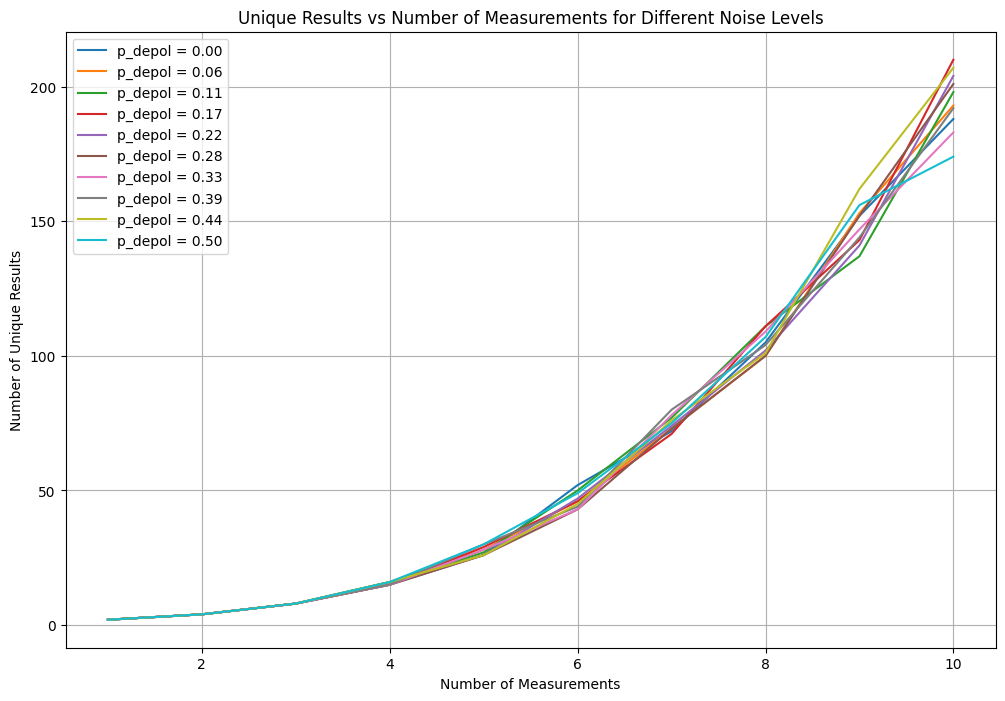

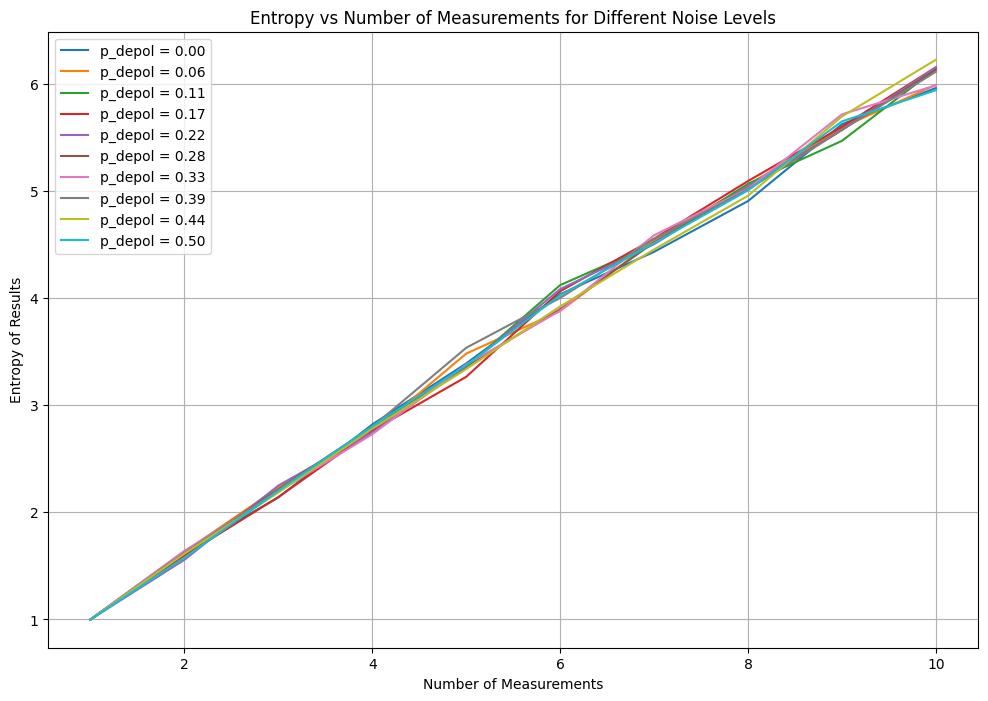

In [4]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import depolarizing_error
import numpy as np
import matplotlib.pyplot as plt

def create_noisy_simulation(p_depol):
    """Create a noise model with depolarizing error."""
    noise_model = NoiseModel()
    error = depolarizing_error(p_depol, 1)
    noise_model.add_all_qubit_quantum_error(error, ['u1', 'u2', 'u3'])
    return noise_model

def multi_measurement_circuit(num_measurements):
    """Create a circuit with multiple measurements."""
    qc = QuantumCircuit(1, num_measurements)
    qc.h(0)  # Put qubit in superposition
    for i in range(num_measurements):
        qc.measure(0, i)
        qc.ry(np.pi/4, 0)  # Apply a rotation after each measurement
    return qc

def run_experiment(num_measurements, num_shots, p_depol):
    """Run the experiment and return results."""
    qc = multi_measurement_circuit(num_measurements)
    noise_model = create_noisy_simulation(p_depol)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=num_shots, noise_model=noise_model)
    result = job.result().get_counts()
    return result

def analyze_results(result, num_measurements):
    """Analyze the results of the experiment."""
    total_shots = sum(result.values())
    unique_results = len(result)
    entropy = sum(-count/total_shots * np.log2(count/total_shots) for count in result.values())
    return unique_results, entropy

# Experiment parameters
num_shots = 1000
p_depol_range = np.linspace(0, 0.5, 10)
max_measurements = 10

results = []

for p_depol in p_depol_range:
    experiment_results = []
    for num_measurements in range(1, max_measurements + 1):
        result = run_experiment(num_measurements, num_shots, p_depol)
        unique_results, entropy = analyze_results(result, num_measurements)
        experiment_results.append((unique_results, entropy))
    results.append(experiment_results)

# Plotting
plt.figure(figsize=(12, 8))
for i, p_depol in enumerate(p_depol_range):
    unique_results = [r[0] for r in results[i]]
    plt.plot(range(1, max_measurements + 1), unique_results, label=f'p_depol = {p_depol:.2f}')

plt.xlabel('Number of Measurements')
plt.ylabel('Number of Unique Results')
plt.title('Unique Results vs Number of Measurements for Different Noise Levels')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
for i, p_depol in enumerate(p_depol_range):
    entropies = [r[1] for r in results[i]]
    plt.plot(range(1, max_measurements + 1), entropies, label=f'p_depol = {p_depol:.2f}')

plt.xlabel('Number of Measurements')
plt.ylabel('Entropy of Results')
plt.title('Entropy vs Number of Measurements for Different Noise Levels')
plt.legend()
plt.grid(True)
plt.show()